In [39]:
import numpy as np
from math import sqrt, exp
from matplotlib import pyplot as plt

In [2]:
def get_stages(yn, A, c, h, t, f):
    s = len(c) # number of stages
    m = len(yn)
    k = np.zeros([s, m])
    k[0] = f(t + c[0] * h, yn)
    for i in range(1, s):
        sum_prevStages = sum([A[i][j] * k[j] for j in range(i)])
        k[i] = f(t + c[i] * h, yn + h * sum_prevStages)
    return k

In [3]:
def runge_kutta_solver(yn, A, b, c, h, t, f):
    s = len(c) # number of stages
    k = get_stages(yn, A, c, h, t, f)
    y_nplus1 = yn + h * sum([b[i] * k[i] for i in range(s)])
    return y_nplus1
    

In [4]:
def rk_time_stepper(y0, A, b, c, h, t0, tf, f):
    time = np.arange(t0, tf+h, h);
    N = len(time)
    y_all_timesteps = np.zeros([N, len(y0)])
    y_all_timesteps[0] = y0
    for n in range(1, N):
        y_all_timesteps[n] = runge_kutta_solver(y_all_timesteps[n-1], A, b, c, h, time[n], f);
    return time, y_all_timesteps
    
    

In [5]:
def two_body_problem(t, y):
    y1, y2, y3, y4 = y
    dy1 = y3
    dy2 = y4
    dy3 = - y1 / ( (y1**2 + y2**2)**(3/2) )
    dy4 = - y2 / ( (y1**2 + y2**2)**(3/2) )
    return [dy1, dy2, dy3, dy4]

In [6]:
# Butcher tables
A_heun = [[0, 0],[1, 0]]
b_heun = [0.5, 0.5]
c_heun = [0, 1]

In [7]:
# Initial values
y0 = [0.5, 0, 0, sqrt(3)]

# Parameters
t0 = 0
tf = 8
h1 = 0.1
h2 = 0.01

In [8]:
time_h1, y_rk_h1 = rk_time_stepper(y0, A_heun, b_heun, c_heun, h1, t0, tf, two_body_problem)
time_h2, y_rk_h2 = rk_time_stepper(y0, A_heun, b_heun, c_heun, h2, t0, tf, two_body_problem)

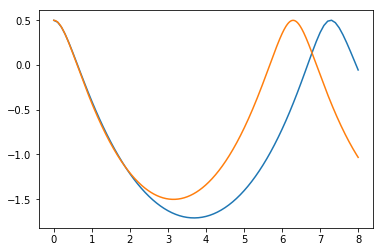

In [9]:
plt.plot(time_h1, y_rk_h1[:, 0])
plt.plot(time_h2, y_rk_h2[:, 0])

In [85]:
#Butcher Tables
A_Euler=np.array([0])
b_Euler=np.array([1])
c_Euler=np.array([0])

A_Heun=np.array([[0,0],[1,0]])
b_Heun=np.array([0.5,0.5])
c_Heun=np.array([0,1])

A_RK3=np.array([[0,0],[2.0/3,0]])
b_RK3=np.array([1.0/4,3.0/4])
c_RK3=np.array([0,2/3.0])

A_RK4=np.array([[0,0,0],[0.5,0,0],[0,0.5,0],[0,0,1]])
b_RK4=np.array([1/6.,1/3.,1/3.,1/6.])
c_RK4=np.array([0,1/2.,1/2.,1])

In [86]:
def ode(t, x):
    # M: nxn matrix, x: nx1 vector
    M = np.array([[-1001, 999],[999, -1001]])
    return M@x

In [87]:
# x0 = np.array([-1, 1])
# x0 = np.array([1, 1])
x0 = np.array([2, 0])

In [116]:
N = 800
h = 1/N
t0 = 0
tf = t0 + N*h
time_ode, y_rk_ode = rk_time_stepper(x0, A_Euler, b_Euler, c_Euler, h, t0, tf, ode)
# time_ode, y_rk_ode = rk_time_stepper(x0, A_RK4, b_RK4, c_RK4, h, t0, tf, ode)

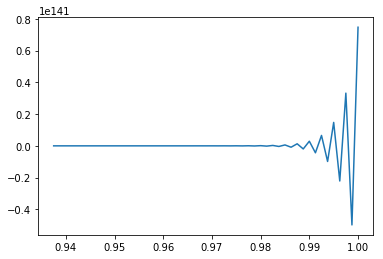

In [122]:
plt.plot(time_ode[750:], y_rk_ode[750:,0])

In [98]:
def exact_solution_ode(t, x0):
    x1 = 0.5 * (x0[0] - x0[1]) * exp(-2000 * t) + 0.5 * (x0[0] + x0[1]) * exp(-2 * t)
    x2 = 0.5 * (x0[1] - x0[0]) * exp(-2000 * t) + 0.5 * (x0[0] + x0[1]) * exp(-2 * t)
    return np.array([x1, x2])

In [99]:
x_exact = np.zeros([N+1, len(x0)])
x_exact[0] = x0
for i in range(1, N+1):
    x_exact[i] = exact_solution_ode(time_ode[i], x0)

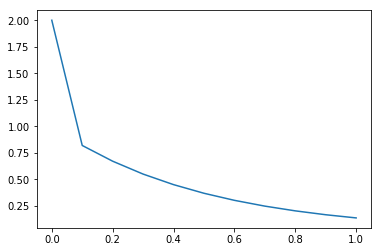

In [92]:
plt.plot(time_ode, x_exact[:,0], "-")